# Kaggle数据集"Airplane Crashes Since 1908"分析学习

> 数据来源:https://www.kaggle.com/saurograndi/airplane-crashes-since-1908

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from pylab import *
plt.rcParams['font.sans-serif']=['simhei']    #设置中文显示
plt.rcParams['axes.unicode_minus']=False    #设置负号的显示
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)    #设置图片大小

In [ ]:
%matplotlib inline

In [ ]:
ac = pd.read_csv('./Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [ ]:
ac.head(1)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."


## 基本情况

>Analysis of the public dataset: "Airplane Crashes and Fatalities Since 1908" (Full history of airplane crashes throughout the world, from 1908-present) hosted by Open Data by Socrata available at:
https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq
Questions
- Yearly how many planes crashed? how many people were on board? how many survived? how many died?
- Highest number of crashes by operator and Type of aircrafts.
- ‘Summary’ field has the details about the crashes. Find the reasons of the crash and categorize them in different clusters i.e Fire, shot down, weather (for the ‘Blanks’ in the data category can be UNKNOWN) you are open to make clusters of your choice but they should not exceed 7.
- Find the number of crashed aircrafts and number of deaths against each category from above step.
- Find any interesting trends/behaviors that you encounter when you analyze the dataset.


## `kaggle`上的分析案例:Who not to fly with...

kaggle上的一个经典分析案例学习.

>https://www.kaggle.com/garydee/who-not-to-fly-with

In [ ]:
operator = ac[['Operator','Fatalities']].groupby('Operator').agg(['sum','count'])
operator[:5]

Fatalities      
                         sum count
Operator                          
A B Aerotransport        3.0     2
AB Aerotransport        58.0     3
ACES Colombia           40.0     3
ADC Airlines            97.0     2
ADES Colombia           22.0     2

### 针对航空公司的数据分析和整理

`ac[['Operator','Fatalities']]` 筛选出了全部的operator和fatalities,即航空公司和死亡人数

`.groupby('Operator')`则对前面的数据进行分组, 形成了一个通过operator进行分类的对象

`agg` is an alias for aggregate. Use the alias.

A passed user-defined-function will be passed a Series for evaluation.

**Examples**
```python
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])
```
Aggregate these functions over the rows.
```python
df.agg(['sum', 'min'])
        A     B     C
sum  12.0  15.0  18.0
min   1.0   2.0   3.0
```
Different aggregations per column.
```python
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})
        A    B
max   NaN  8.0
min   1.0  2.0
sum  12.0  NaN
```
Aggregate over the columns.
```python
df.agg("mean", axis="columns")
0    2.0
1    5.0
2    8.0
3    NaN
dtype: float64
```

Examples

```python 
df = pd.DataFrame({'A': [1, 1, 2, 2],
                      'B': [1, 2, 3, 4],
                      'C': np.random.randn(4)})
df
   A  B         C
0  1  1  0.362838
1  1  2  0.227877
2  2  3  1.267767
3  2  4 -0.562860
```
The aggregation is for each column.
```python
df.groupby('A').agg('min')
   B         C
A
1  1  0.227877
2  3 -0.562860
```
Multiple aggregations
```python
df.groupby('A').agg(['min', 'max'])
    B             C
  min max       min       max
A
1   1   2  0.227877  0.362838
2   3   4 -0.562860  1.267767
```
Select a column for aggregation
```python
df.groupby('A').B.agg(['min', 'max'])
   min  max
A
1    1    2
2    3    4
```
Different aggregations per column
```python
df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
    B             C
  min max       sum
A
1   1   2  0.590716
2   3   4  0.704907
```

`agg`可以一次传递多个计算的参数, 比如: sum,max,min,mean,count

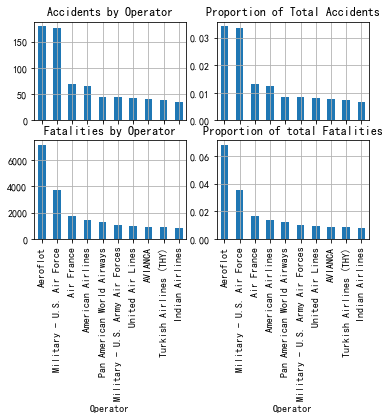

In [ ]:
#设置图像空间为2*2,并分别命名为ax1-ax4
#ax1|ax2
#ax3|ax4
fig_ops,((ax1, ax2), (ax3, ax4))=plt.subplots(2,2,sharex=True)
#做了一次accident的分析
accidents = operator['Fatalities','count'].sort_values(ascending=False)
totalacc = accidents.sum()
#利用DataFrame的'矩阵'计算,得到结果,不需要采用循环来计算
accprop = accidents/totalacc
accidents.head(10).plot(kind='bar',title='Accidents by Operator',ax=ax1,grid=True,rot=90)
accprop.head(10).plot(kind='bar',title='Proportion of Total Accidents',ax=ax2,grid=True,rot=90)
fatalities = operator['Fatalities','sum'].sort_values(ascending=False)
fatalities.head(10).plot(kind='bar',title='Fatalities by Operator',ax=ax3,grid=True,rot=90)
totalfatal = fatalities.sum()
fatalprop = fatalities/totalfatal
fatalprop.head(10).plot(kind='bar',title='Proportion of total Fatalities',ax=ax4,grid=True,rot=90)

In [ ]:
props = operator['Fatalities'].reset_index()    #reset_index将index列还原为普通数据列